# Product Range Analysis
## V. Statistical Hypothesis



## Table of Contents

- [Project Overview](#overview)
- [Statistical Hypotheses](#hypothesis)
- [Summary of Observations, Insights, and Conclusion](#summary)
- [Resources](#resources)

<a id='overview'></a>
## Overview

You are given a sales transactions history data of an online store that sells household goods. Perform product range and customer segmentation analysis to help the stakeholders identify the top performing products, categories, and customers. 


### Business Problem
Based on the sales transactions data:
1. Identify the top performers: top customer, top product, and top category
2. Identify the customer segments based on RFM
3. Did higher-priced products contribute to higher sales than the lower-priced products?
4. Were sales higher during Christmas season (December) as compared to other months?


### Datasets and Attributes

The original dataset contains **541909** transaction records from **2018-11-29 to 2019-12-07**. It has 7 attributes:

- **InvoiceNo**: Invoice reference number uniquely assigned for each transaction. If the InvoiceNo starts with 'C', it indicates a cancellation
- **StockCode**: Product or item code uniquely assigned to each distinct product
- **Description**: Product or item name
- **Quantity**: The quantities for each product or item per transaction
- **InvoiceDate**: Invoice date and time, the day and time the transaction was generated by the system
- **UnitPrice**: Product price per unit
- **CustomerID**: Customer reference number uniquely assigned to each customer


### Project Scope
1. Data Preprocessing 
2. Exploratory Data Analysis
3. Customer Segmentation based on RFM Metrics (using percentile ranking and K-means clustering)
4. Product Categorization & Product Category Analysis
5. Statistical Hypotheses
6. Insights
7. Dashboard

<a id='hypothesis'></a>
### Statistical Hypotheses

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load data

sales_df = pd.read_pickle("C:/Users/offic/OneDrive/Desktop/product data analysis/sales_df.pkl")
sales_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,LineTotal,Date,Period,Day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850,15.30,2018-11-29,2018-11,Thursday,8
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850,20.34,2018-11-29,2018-11,Thursday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850,22.00,2018-11-29,2018-11,Thursday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850,20.34,2018-11-29,2018-11,Thursday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850,20.34,2018-11-29,2018-11,Thursday,8


In [3]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 533652 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    533652 non-null  object        
 1   StockCode    533652 non-null  object        
 2   Description  533652 non-null  object        
 3   Quantity     533652 non-null  int64         
 4   InvoiceDate  533652 non-null  datetime64[ns]
 5   UnitPrice    533652 non-null  float64       
 6   CustomerID   399689 non-null  object        
 7   LineTotal    533652 non-null  float64       
 8   Date         533652 non-null  object        
 9   Period       533652 non-null  period[M]     
 10  Day          533652 non-null  object        
 11  Hour         533652 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(6), period[M](1)
memory usage: 50.9+ MB


In [4]:
sales_df.describe()

,Quantity,InvoiceDate,UnitPrice,LineTotal,Hour
count,533652.000000,533652,533652.000000,533652.000000,533652.000000
mean,9.654949,2019-07-02 10:28:00.643452928,3.277232,18.309535,13.078420
min,-80995.000000,2018-11-29 08:26:00,0.000000,-168469.600000,6.000000
25%,1.000000,2019-03-26 11:34:00,1.250000,3.750000,11.000000
50%,3.000000,2019-07-17 15:23:00,2.080000,9.840000,13.000000
75%,10.000000,2019-10-16 17:10:00,4.130000,17.400000,15.000000
max,80995.000000,2019-12-07 12:50:00,649.500000,168469.600000,20.000000
std,219.688312,NaN,4.507985,368.909494,2.447198


### I. High-priced products contribute to higher sales than the low-priced products  

- **Null Hypothesis**: There is no difference between the mean sales of low-priced products and high-priced products
- **Alternative Hypothesis**: Mean sales of low-priced products is different than the mean sales of high-priced products
- **Criteria for Decision**: alpha = 0.05
    - Accept null hypothesis if p-vaue is greater than alpha
    - Reject null hypothesis if p-value is less than alpha
- **Central Limit Theorem**<br>
Apply central limit theorem to see if the means of many samples randomly drawn from the distribution of *LineTotal* values would look like a normal distribution.

#### Central Limit Thoeorem

<Figure size 1200x600 with 0 Axes>

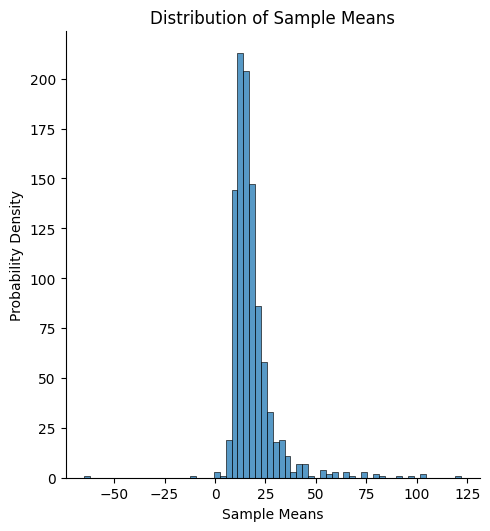

In [5]:
# Apply central limit theorem on total sales values

sales = sales_df['LineTotal']

#plot the means of 1000 samples of size 30
sample_means = []
for n in range(1000):
    sample = np.random.choice(sales, 30)
    mean = np.mean(sample)
    sample_means.append(mean)
    
plt.figure(figsize=[12,6])
sns.displot(sample_means)
plt.xlabel('Sample Means')
plt.ylabel('Probability Density')
plt.title('Distribution of Sample Means')
plt.show();

The distribution looks normal enough with few outliers.

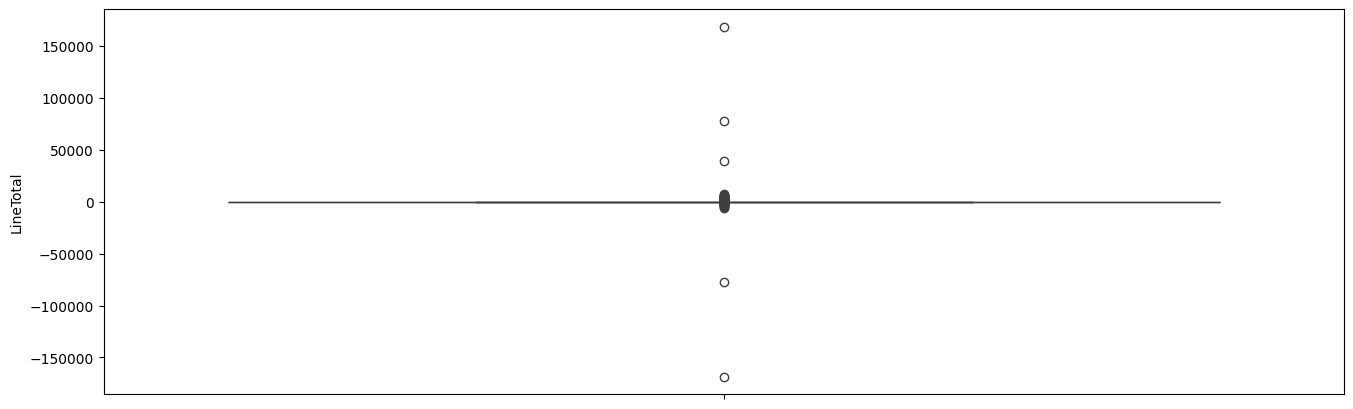

In [6]:
# Plot the distribution of Sales values

plt.figure(figsize = [16, 5])
sns.boxplot(sales);

The plot shows that there are some low and high outliers which need to be removed to ensure that these do not affect the result of hypothesis testing and focus the analysis on the vast majority of behavior of sales.

- IQR = Q3-Q1
- Low outliers = Q1-1.5(IQR) 
- High outliers = Q3 + 1.5(IQR)

In [7]:
Q1 = np.percentile(sales, 25)
Q3 = np.percentile(sales, 75)
IQR = Q3-Q1
low_outliers = Q1 - (1.5 * IQR)
high_outliers = Q3 + (1.5 * IQR)

print('Low outliers are values below', low_outliers)
print('High outliers are values above', high_outliers)

Low outliers are values below -16.724999999999998
High outliers are values above 37.875


In [8]:
# Get statistical data of total sales values

sales_df['LineTotal'].describe()

count    533652.000000
mean         18.309535
std         368.909494
min     -168469.600000
25%           3.750000
50%           9.840000
75%          17.400000
max      168469.600000
Name: LineTotal, dtype: float64

#### Remove Outliers

In [9]:
# Remove outliers

sales_trimmed = sales_df.loc[(sales_df['LineTotal'] >= low_outliers) & (sales_df['LineTotal'] <= high_outliers)]
sales_trimmed['LineTotal'].describe()

count    489921.000000
mean         10.221137
std           8.461877
min         -16.650000
25%           3.300000
50%           8.290000
75%          15.800000
max          37.800000
Name: LineTotal, dtype: float64

#### Sample Data

In [10]:
# Create sample data

low_priced = sales_trimmed[sales_trimmed['UnitPrice'] < 10]
high_priced = sales_trimmed[sales_trimmed['UnitPrice'] >= 10]
sample1 = low_priced['LineTotal']
sample2 = high_priced['LineTotal']

In [11]:
# Get statistical data of sample1

sample1.describe()

count    471870.000000
mean          9.933423
std           8.345671
min         -16.640000
25%           3.290000
50%           7.900000
75%          15.300000
max          37.800000
Name: LineTotal, dtype: float64

In [12]:
# Get statistical data of sample2

sample2.describe()

count    18051.000000
mean        17.742238
std          7.995795
min        -16.650000
25%         12.500000
50%         16.130000
75%         24.920000
max         37.500000
Name: LineTotal, dtype: float64

#### Plot distribution of both samples

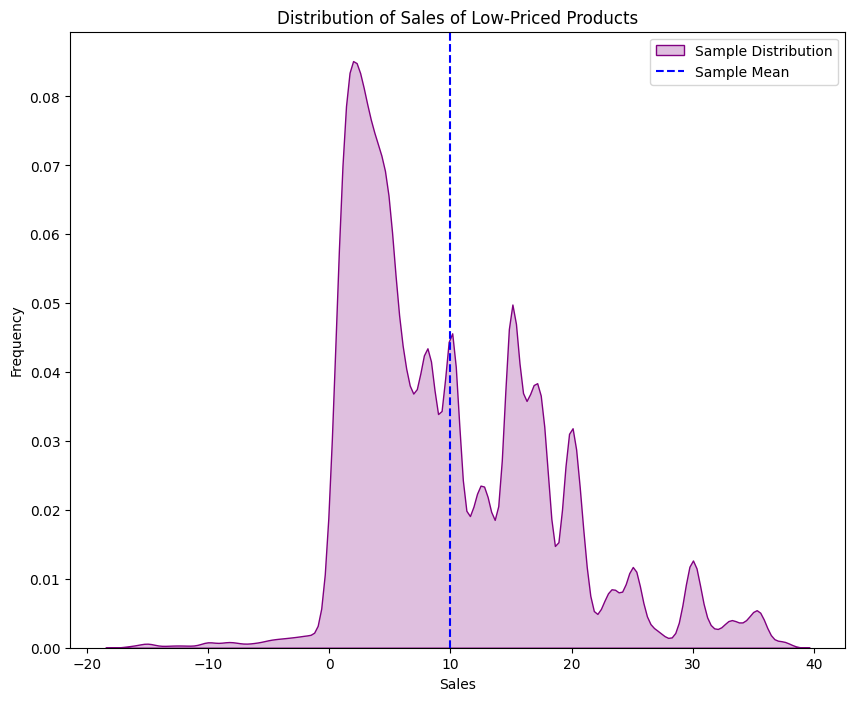

In [13]:
# Plot distribution of low-priced sales

plt.figure(figsize=[10,8])
sns.kdeplot(sample1, label='Sample Distribution', color='purple', shade=True)
plt.axvline(x = sample1.mean(), color='blue', linestyle='--', label='Sample Mean')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales of Low-Priced Products')
plt.legend()
plt.show();

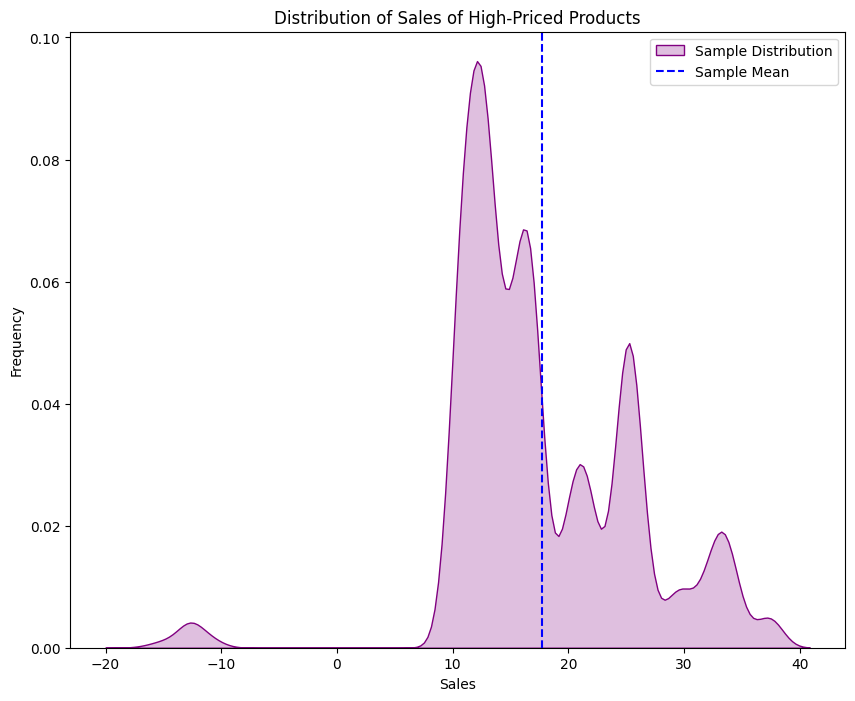

In [14]:
# Plot distribution of high-priced sales

plt.figure(figsize=[10,8])
sns.kdeplot(sample2, label='Sample Distribution', color='purple', shade=True)
plt.axvline(x = sample2.mean(), color='blue', linestyle='--', label='Sample Mean')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales of High-Priced Products')
plt.legend()
plt.show();

#### 2-Sample T-test and Mann-Whitney U test

In [15]:
# Perform 2-sample T-test on actual sample data

alpha=0.05
t_results = stats.ttest_ind(sample1, sample2)
print('p-value: ', t_results.pvalue)
if t_results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

p-value:  0.0
We reject the null hypothesis


In [16]:
# Perform Mann-Whitney U test

alpha=0.05
m_results = stats.mannwhitneyu(sample1, sample2)
print('p-value: ', m_results.pvalue)
if m_results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

p-value:  0.0
We reject the null hypothesis


#### Conclusion

**Based on the data, we reject the null hypothesis.**

Based on the result of statistical test and excluding the outliers, we found out that there is a difference between the average sales of low-priced products and average sales of high-priced products. Low price values are unit prices below 10 and high price values are unit prices 10 and above. This could also mean that the average sales of low-priced products can be higher than the average sales of high-priced products or vice-versa.

### II. Sales are higher during Christmas season (December) as compared to other months.

- **Null Hypothesis**: There is no difference between the average sales in December and the average sales in other months
- **Alternative Hypothesis**: The average sales in December is different than the average sales in other months.
- **Criteria for Decision**: alpha = 0.05
    - Accept null hypothesis if p-vaue is greater than alpha
    - Reject null hypothesis if p-value is less than alpha

In [17]:
# Use data where outliers have been removed

sales_trimmed['LineTotal'].describe()

count    489921.000000
mean         10.221137
std           8.461877
min         -16.650000
25%           3.300000
50%           8.290000
75%          15.800000
max          37.800000
Name: LineTotal, dtype: float64

#### Sample Data

In [18]:
# Subset data into dec and non_dec

dec_sales = sales_trimmed[sales_trimmed['InvoiceDate'].dt.month == 12]
non_dec_sales = sales_trimmed[sales_trimmed['InvoiceDate'].dt.month < 12]

In [19]:
# Get statistical data for dec

sample_dec = dec_sales['LineTotal']
sample_dec.describe()

count    51494.000000
mean         9.606959
std          8.496965
min        -16.500000
25%          3.260000
50%          7.250000
75%         15.000000
max         37.800000
Name: LineTotal, dtype: float64

In [20]:
# Get statistical data for non_dec

sample_non_dec = non_dec_sales['LineTotal']
sample_non_dec.describe()

count    438427.000000
mean         10.293273
std           8.454829
min         -16.650000
25%           3.300000
50%           8.290000
75%          15.900000
max          37.800000
Name: LineTotal, dtype: float64

#### Plot Distribution for both Samples

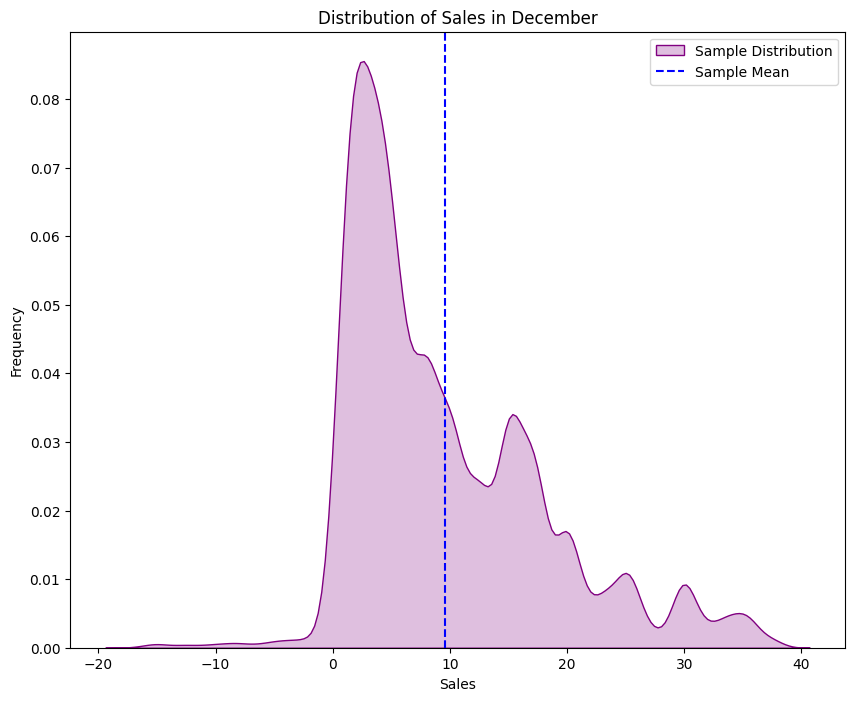

In [21]:
# Plot distribution of dec sales

plt.figure(figsize=[10,8])
sns.kdeplot(sample_dec, label='Sample Distribution', color='purple', shade=True)
plt.axvline(x = sample_dec.mean(), color='blue', linestyle='--', label='Sample Mean')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales in December')
plt.legend()
plt.show();

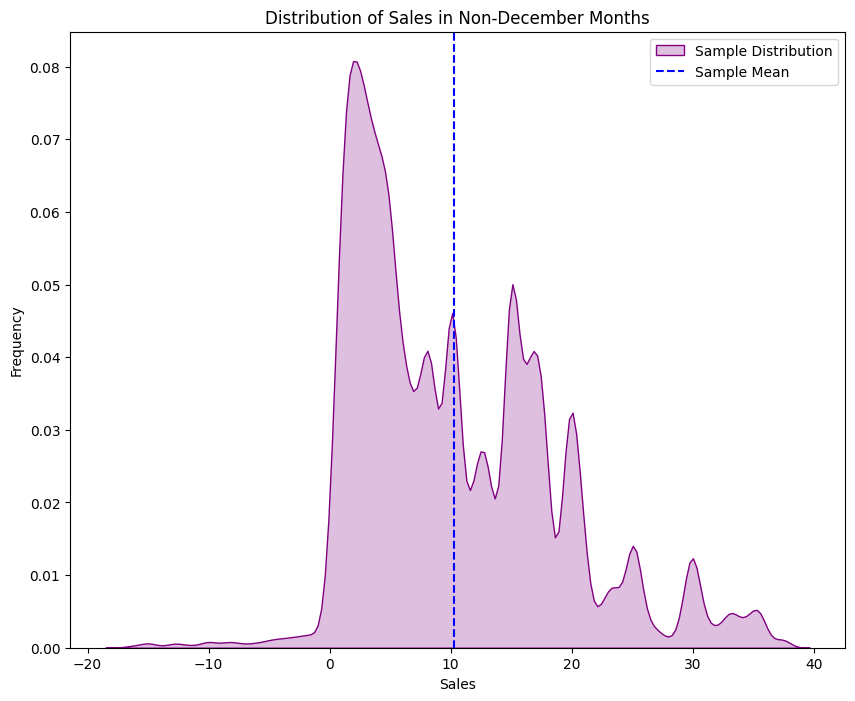

In [22]:
# Plot distribution of no_dec sales

plt.figure(figsize=[10,8])
sns.kdeplot(sample_non_dec, label='Sample Distribution', color='purple', shade=True)
plt.axvline(x = sample_non_dec.mean(), color='blue', linestyle='--', label='Sample Mean')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales in Non-December Months')
plt.legend()
plt.show();

#### 2-Sample T-test

In [23]:
# Perform 2-sample T-test on actual sample data

alpha=0.05
results_a = stats.ttest_ind(sample_dec, sample_non_dec)
print('p-value: ', results_a.pvalue)
if results_a.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

p-value:  6.514817718583994e-68
We reject the null hypothesis


#### Conclusion

**Based on the data, we reject the null hypothesis.**

Based on the result of statistical test and excluding the outliers, we found out that there is a difference between the average sales generated in December and average sales in other months. This could also mean that the average sales in December can be higher than the average sales in other months or vice-versa.

<a id='summary'></a>
## Summary of Observations, Insights, & Conclusion

### Observations (Assumptions)
- The original dataset is a sales transaction history of an online gifts store which contains **541,909** transaction records from ***2018-11-29 to 2019-12-07*** which has the following attributes: ``InvoiceNo``, ``StockCode``, ``Description``, ``Quantity``, ``InvoiceDate``, ``UnitPrice``, and ``CustomerID``.<br><br>

- The data went down to **531,172** records after performing data preprocessing. The following records were removed:
    - 5,268 duplicated records
    - 2,989 records that are not related to sales transactions or sale of products (bad debts adjustments, postage, dotcom postage, manual, carriage, CRUK commission, samples, bank charges, amazon fees, and gift vouchers)
    - 2,480 records where price is 0<br><br>
        
- There are **131,516** records without ``CustomerID`` which appear to be valid transactions. These could be those customers who are not registered and purchased the products without signing up.<br><br>

- There are **3,361** ``StockCodes`` with multiple price levels. Different price levels could indicate that there may be wholesale prices and retail prices or just simply price increase but since we don't have information about the store's pricing policy - these are just assumptions and for this reason, it is not necessary to make any changes.<br><br>

- There are **8,668** cancellations (determined by ``InvoiceNo`` that starts with ‘C’ and with negative quantity). Out of **8,668** cancellations, there are **2,017** with corresponding records having positive quantity. Meaning, a pair of records that has the same ``Customer ID``, ``InvoiceNo``, ``StockCode`` but with positive and negative quantities. Ideally, both the original and cancelled transaction records should be removed since the negative quantity will offset the positive quantity. Hence, the net effect is zero.<br><br>

- There are **four** cancellation scenarios in the data:
    - 1:1 match (original and cancelled transaction records that have the same ``Customer ID``, ``InvoiceNo``, ``StockCode`` and matching positive/negative quantities)
    - Partial cancellations
    - Cancellations without the corresponding original orders
    - Original orders that were cancelled then placed the orders again<br><br>
        
- The **8,668** cancellations belong to **1,535** customers. It is not accurate to just remove the cancellations as this will result in overstatement of sales transactions. The cancellation cases must be analyzed if records are to be removed. The only way to find and check the cancellation scenarios is to do the search by customer. For the purpose of this analysis, no changes will be made.<br><br>

- There are **3,914** unique ``StockCodes`` and **4,019** unique ``Descriptions``. However, ``StockCode`` and ``Description`` ideally should have the same number of unique values. There are **220** ``StockCodes`` with multiple ``Descriptions``.

### Insights & Conclusion
#### Metrics Overview of sales transactions
- Total number of customers: ``4,362``
- Total number of orders: ``23,195``
- Total units sold: ``5,291,263``
- Total revenue: ``$9,770,920``
- Average order value: ``$421``
- Total number of unique products: ``3,914``

#### Top performers
- The top customer is **CustomerID 14646** which had the highest spend of ``$278,778`` and the highest number of units purchased at ``196,556``.<br><br>
- The top product is **REGENCY CAKESTAND 3 TIER** which had the highest revenue of ``$164,459``.<br><br>
- The most popular product is **WORLD WAR 2 GLIDERS ASSTD DESIGNS** which sold for ``53,751`` units.<br><br>
- **November 2019** is the top month with the highest revenue of ``$1,459,764`` which represents ``15% of the total revenue`` and with total orders of ``3,251`` which represents ``14% of the total orders``.<br><br>
- **Friday** is the top day of the week with the highest revenue of ``$2,080,449`` which represents ``21% of the total revenue`` and with total orders of **5,101** which is ``22% of the total orders``.<br><br>
- **12pm** was the best hour when a total revenue of ``$1,393,570``, which represents ``14% of total revenue`` and ``76,939`` orders which is ``14% of the total orders`` were generated. **10pm** is the 2nd best hour when a total revenue of ``$1,296,167`` which is ``13% of total revenue`` were generated. **3pm** is the 2nd best hour based on the number of orders when a total of ``76,106`` orders were generated. 

#### Order cancellations / Returns
- **PAPER CRAFT, LITTLE BIRDIE** is the product with the largest cancellations/returns: ``80,995`` units with the amount of ``$168,470``. <br><br>
- **REGENCY CAKESTAND 3 TIER** is the most frequently returned product, which was returned ``180`` times.<br><br>
- **CustomerID 16446** is the customer with the largest cancellations/returns: ``80,995`` units with the amount of ``$168,470``.<br><br>
- **CustomerID 14911** has cancelled/returned orders most frequently: ``222`` times. <br><br>
- **December 2019** is the month with the highest amount and number of cancellations/returns: ``83,005`` units with the amount of ``$172,836``.<br><br>
- **January 2019** has the second highest number of cancellations/returned items: ``79,970`` units.

#### RFM Segments 
- The result of customer segmentation based on RFM metrics using percentile ranking is better than using Kmeans clustering. The segmentation using percentile ranking gives more insights and is more useful to understand each segment's unique needs and tailor the products and campaign strategies to meet those needs.<br><br>

- Customers were segmented based on the folowing RFM scores:
    - RFM score of 9: Top-performing customers (714 customers)
    - RFM score of 7 and 8: Active customers (992 customers)
    - RFM score of 5 and 6: Unsteady customers (1185 customers)
    - RFM score of 4: Customers at risk (729 customers)
    - RFM score of 3: Inactive customers (742 customers)<br><br>

- The combined proportion of top and active customers is only ``39.11%`` which means only 39.11% of customer base are making their purchases in an active manner.<br><br>

- Unsteady customer made up the ``27%`` of customer base which means that about 27% customers could either be active or inactive.<br><br>

- The combined proportion of customers at risk and inactive customers is ``34%``. 34% of customer base need to be reactivated and encouraged to make more purchases and frequently.<br><br>

- Top-performing customers generated ``$5,050,928`` in revenue.<br><br>

- Top-performing customers consistently generated the most revenue per month.<br><br>

- The top-performing customers consistently generated the highest revenue per day of the week.<br><br>
- ``50%`` of the total orders were placed by top-performing customers.

#### Product Category Analysis
- Product categories were to be based on the ``Description`` column.<br><br>
- There were seven categories identified and created using text processing, clustering and word cloud:
    1. Wicker items
    2. Bags
    3. Drawer Knobs
    4. Tea light holders
    5. Kitchen and pantry items
    6. Food and beverage carriers
    7. Arts, crafts, and gifts<br><br>
    
- The best performing category is **Arts, crafts, and gifts** with a revenue of ``$6,471,904`` which represents ``66.24% of total revenue``. ``32,626,011`` units were sold under this category.<br><br>
- **Arts, Crafts, and gifts** consistently generated the **highest revenue per month.**<br><br>
- **Arts, Crafts, and gifts** consistently generated the **highest revenue per day of the week.**<br><br>
- ``83% of total unique products`` belong to **Arts, Crafts, and gifts category.**

#### Statistical Hypotheses
- Higher-priced products do not necessarily contribute to higher sales than the lower-priced products. The average sales of lower-priced products can be higher than the average sales of the higher-priced products.<br><br>
- Average sales in December can be higher than the average sales in other months.
